## CA1


Github link

https://github.com/riccardopossier/Videogame_dataset

Import Datset & libraries

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vgsales.csv')

check number of rows and number of features present in the dataset

In [3]:
num_rows, num_columns = df.shape[0], df.shape[1]
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")

Number of rows: 16719, Number of columns: 16


check features names

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


Overview

In [5]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("vgsales File.html")

check total number of missing values per column and relative percentage 

In [6]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

compute the percentage of missing values per column

In [7]:
missing_values_perc = df.isnull().sum()/num_rows * 100
missing_values_perc

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

We decide to drop the rows which have missing values for all the features that have a very small number of missing values

In [8]:
df.dropna(subset=['Name', 'Genre', 'Publisher'], inplace=True)


We use the mean for Critic_Score, Critic_Count (high missingness)

In [9]:
df['Year_of_Release'].fillna(df['Year_of_Release'].mean(), inplace=True)
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['Critic_Count'].fillna(df['Critic_Count'].mean(), inplace=True)

We use the mode User_Score, Rating (high missingness)

In [10]:
df['User_Score'].fillna(df['User_Score'].mode()[0], inplace=True) 
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True) 
df['Developer'].fillna(df['Developer'].mode()[0], inplace=True) 

Check the best approach for User_Count

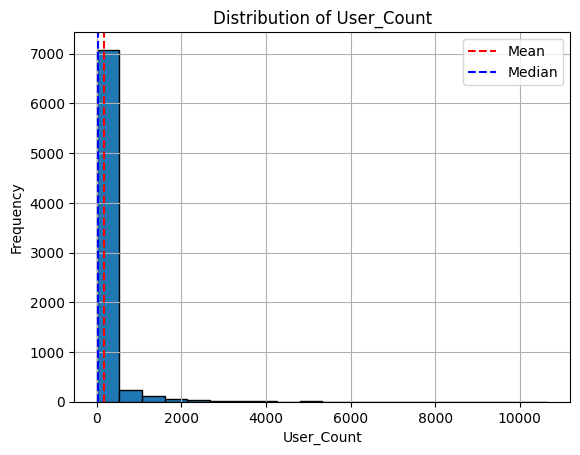

In [11]:
user_count = df['User_Count'] 
mean_user_count = user_count.mean() 
median_user_count = user_count.median() 
user_count.hist(bins=20, edgecolor='black') 
plt.title('Distribution of User_Count')
plt.xlabel('User_Count')
plt.ylabel('Frequency')
plt.axvline(mean_user_count, color='r', linestyle='dashed', label='Mean')
plt.axvline(median_user_count, color='b', linestyle='dashed', label='Median')
plt.legend()
plt.show()

We use the median for User_Count due to it is very skewed

In [12]:
df['User_Count'].fillna(df['User_Count'].median(), inplace=True)

In [13]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

### 1.1) What are the top 5 games by global sales?

Sort the dataframe by Global_Sales in descending order

In [14]:
df_sorted = df.sort_values(by='Global_Sales', ascending=False)

Get the top 5 games

In [15]:
top_5_games = df_sorted.head(5)


Print the top 5 games by Global Sales

In [16]:
print("Top 5 Games by Global Sales:")
print(top_5_games[['Name', 'Global_Sales']])

Top 5 Games by Global Sales:
                       Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37


Let's plot the top 5 games by Global Sales

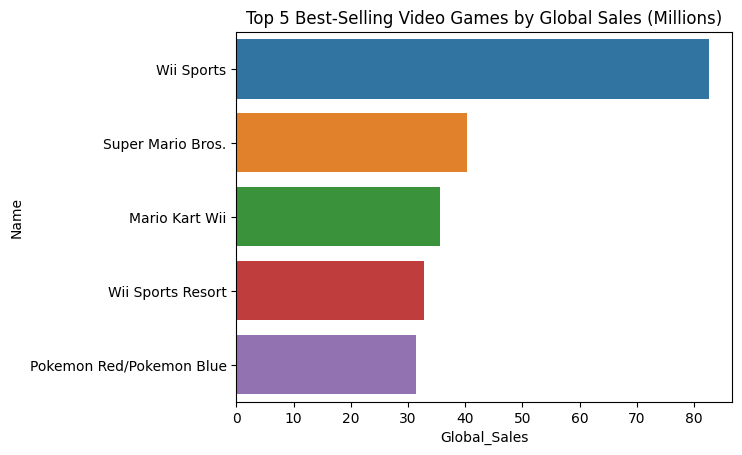

In [17]:
sns.barplot(x='Global_Sales', y='Name', data=top_5_games)
plt.title("Top 5 Best-Selling Video Games by Global Sales (Millions)")
plt.show()

Out of curiosity let's check the lowest 5 games by Global Sales

In [18]:
df_sorted = df.sort_values(by='Global_Sales', ascending=True)
bottom_5_games = df_sorted.head(5)
print("\nBottom 5 Games by Global Sales:")
print(bottom_5_games[['Name', 'Global_Sales']])


Bottom 5 Games by Global Sales:
                                                    Name  Global_Sales
16718                                Winning Post 8 2016          0.01
16295                                             Casper          0.01
16294  Simple 2000 Series Vol. 120: The Saigo no Nipp...          0.01
16293                 Rave Master: Special Attack Force!          0.01
16292                                     K-1 Grand Prix          0.01


Can be interesting to compute for the top5 most sold games to compute how much sales percentage they account in the total sales of the 5 top sold games. We can use a piue chart to visualize this.

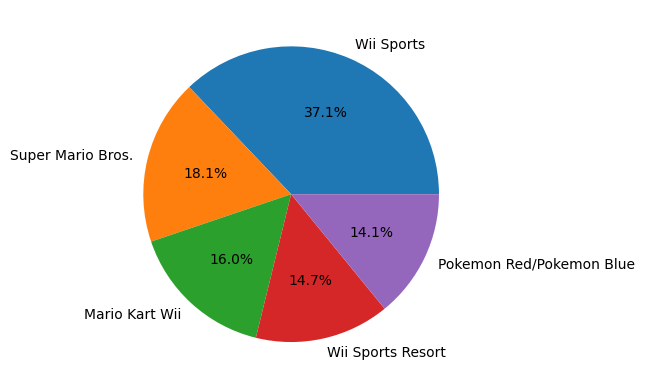

In [19]:
top5_sales = top_5_games['Global_Sales']
top5_sales_perc = top5_sales / top_5_games['Global_Sales'].sum() * 100
plt.pie(top5_sales_perc, labels=top_5_games['Name'].values, autopct='%1.1f%%');

### 1.2) Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?

To compute the correaltion we use the function .corr() from pandas. This function computes the correlation between the columns of a dataframe. We will use the Pearson correlation coefficient to compute the correlation between the columns.

the Pearson correlation coefficient is a measure of the linear correlation between two variables. It has a value between -1 and 1. A value of 1 means that the two variables are perfectly correlated, a value of -1 means that the two variables are perfectly negatively correlated and a value of 0 means that the two variables are not correlated.

the rational for doing that is beacuase we want to see if the sales in North America are correlated with the sales in Japan. If the correlation is high, then we can say that the sales in North America are correlated with the sales in Japan. If the correlation is low, then we can say that the sales in North America are not correlated with the sales in Japan.

reference: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Filter data for years 2010-2014

In [20]:
df_filtered = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)]

Calculate correlation between 'na_sales' and 'jp_sales'

In [21]:
correlation = df_filtered['NA_Sales'].corr(df_filtered['JP_Sales'])

In [22]:
print("Correlation between NA_Sales and JP_Sales (2010-2014):", correlation)

Correlation between NA_Sales and JP_Sales (2010-2014): 0.26035708726321166


let's also do a plot on the correlation between 'na_sales' and 'jp_sales'

- We can first plot a scatterplot where the x-axis is 'na_sales' and the y-axis is 'jp_sales' to see if there is a linear relationship between the two variables. Due to the outliers for better visualization we can use a log scale for the x-axis and y-axis.
  
- We can also do a regplot to plot the regression line between the two variables.

<Axes: title={'center': 'Scatter plot of NA_Sales and JP_Sales'}, xlabel='NA_Sales', ylabel='JP_Sales'>

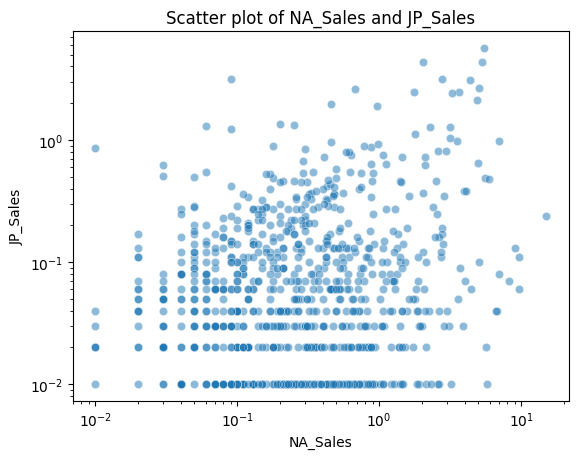

In [23]:
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter plot of NA_Sales and JP_Sales')
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=df_filtered, alpha=0.5)

plot regression line to show the correlation

<Axes: title={'center': 'Regression plot of NA_Sales and JP_Sales'}, xlabel='NA_Sales', ylabel='JP_Sales'>

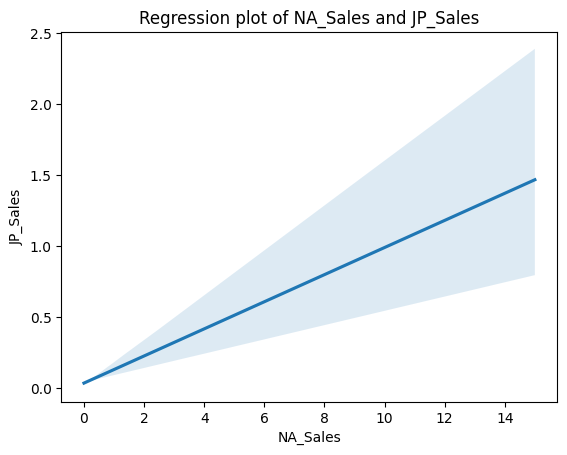

In [24]:
plt.title('Regression plot of NA_Sales and JP_Sales')
sns.regplot(x='NA_Sales', y='JP_Sales', data=df_filtered, scatter=False)


From the results obtained plots and corr_coefficient=0.26 we can conclude that:
- There is slightly positive linear relationship. This means that the sales in North America are slightly correlated with the sales in Japan. This means that if the sales in North America increase, the sales in Japan will also increase. 

### 1.3) What is the distribution of the most popular 4 game genres? 

Create a bar chart of the genre counts but using different colors for the top4 genres so we can compare the distribution of the top4 genres with the other genres.

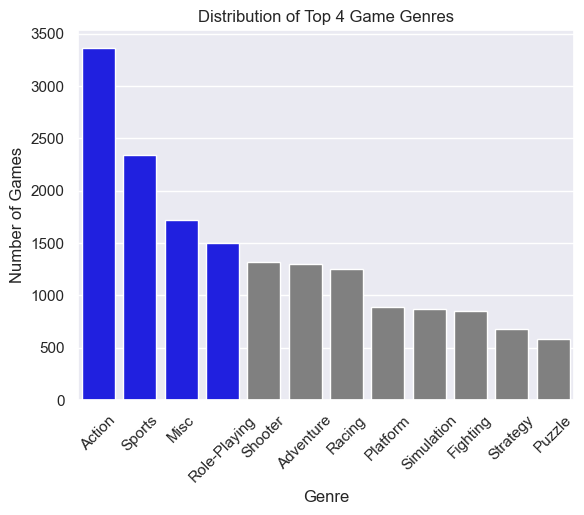

In [25]:
sns.set_theme(style="darkgrid")
genre_counts = df['Genre'].value_counts()


colors = ['blue' if x in genre_counts.index[:4] else 'grey' for x in genre_counts.index]
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=colors)


plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.title("Distribution of Top 4 Game Genres")
plt.xticks(rotation=45) 
plt.show()

we can also use a piechart to see to which percentage the top 4 genres correspond to the total number of games

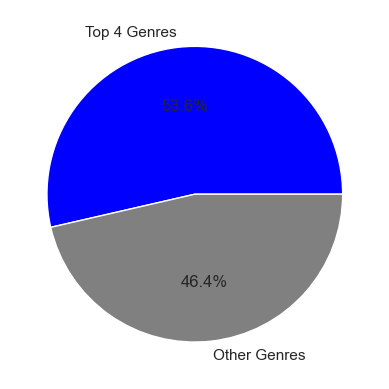

In [26]:
top4_genre_perc = genre_counts[:4].sum() / genre_counts.sum() * 100
other_genre_perc = 100 - top4_genre_perc
genre_perc = [top4_genre_perc, other_genre_perc]
genre_labels = ['Top 4 Genres', 'Other Genres']
plt.pie(genre_perc, labels=genre_labels, autopct='%1.1f%%', colors=['blue', 'grey']);

This tells us that the top4 genres account for more than 50% of the total genres. 

### 1.4) Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?

There are some missing values in the column year of release. We will discard the rows with missing values

In [27]:
df_filtered_year = df.dropna(subset=['Year_of_Release'])

I want to plot a line representing the average eu_sales for each year. Use two color one for years < 2005 and another for years >= 2005

In [28]:
df_2005 = df_filtered_year[df_filtered_year['Year_of_Release'] >= 2005]
df_2005 = df_2005.groupby('Year_of_Release')['EU_Sales'].mean().reset_index()

df_before_2005 = df_filtered_year[df_filtered_year['Year_of_Release'] < 2005]
df_before_2005 = df_before_2005.groupby('Year_of_Release')['EU_Sales'].mean().reset_index()

Plot the average EU_Sales for each year before and after 2005

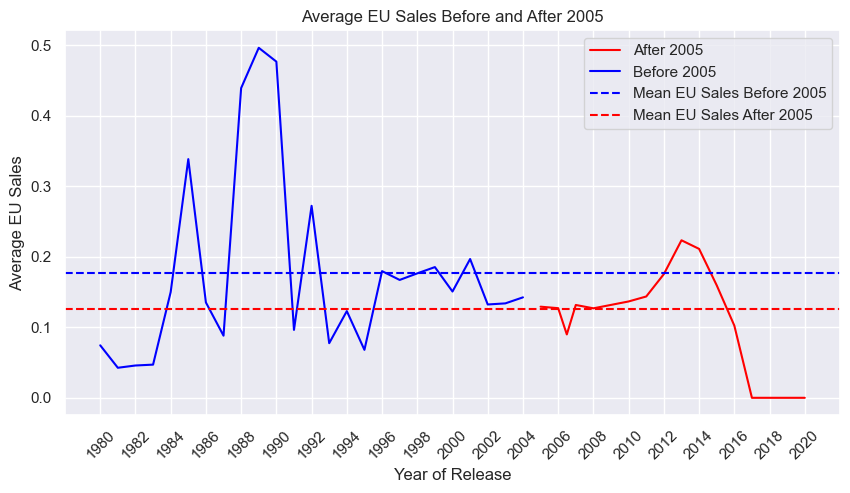

In [29]:
plt.figure(figsize=(10, 5))
plt.title('Average EU Sales Before and After 2005')
plt.xlabel('Year of Release')
plt.ylabel('Average EU Sales')
plt.plot(df_2005['Year_of_Release'], df_2005['EU_Sales'], color='red', label='After 2005')
plt.plot(df_before_2005['Year_of_Release'], df_before_2005['EU_Sales'], color='blue', label='Before 2005')
plt.xticks(np.arange(1980, 2021, 2))
plt.xticks(rotation=45)
mean_sales_before_2005 = df_before_2005['EU_Sales'].mean()
mean_sales_after_2005 = df_2005['EU_Sales'].mean()
plt.axhline(mean_sales_before_2005, color='blue', linestyle='--', label='Mean EU Sales Before 2005')
plt.axhline(mean_sales_after_2005, color='red', linestyle='--', label='Mean EU Sales After 2005')
plt.legend();

We can see from the analysis above that older games (<=2005) have a higher mean eu_sales than newer games (>2005). 

### 1.5) What are the 3 most common “developer” in the dataset?  


In [37]:
developer_counts = df['Developer'].value_counts()
top_3_developers = developer_counts.head(3)
top_3_developers

Developer
Ubisoft      6780
EA Sports     172
EA Canada     167
Name: count, dtype: int64

In [31]:
developer_counts


Developer
Ubisoft                        6780
EA Sports                       172
EA Canada                       167
Konami                          162
Capcom                          139
                               ... 
Realmforge Studios                1
Sega, Tom Create                  1
Sarbakan Inc.                     1
Pacific Century Cyber Works       1
Interchannel-Holon                1
Name: count, Length: 1695, dtype: int64

Create a bar chart of the genre counts but using different colors for the top4 genres

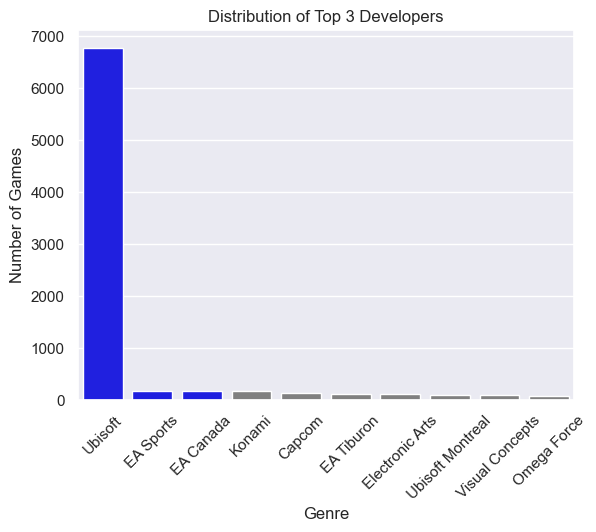

In [32]:
colors = ['blue' if x in developer_counts.index[:3] else 'grey' for x in developer_counts.index]
sns.barplot(x=developer_counts.index[:10], y=developer_counts.values[:10], palette=colors[:10])


plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.title("Distribution of Top 3 Developers")
plt.xticks(rotation=45) 
plt.show()

we can also use a piechart to see to which percentage the top 3 developers genres correspond to the total number of developers

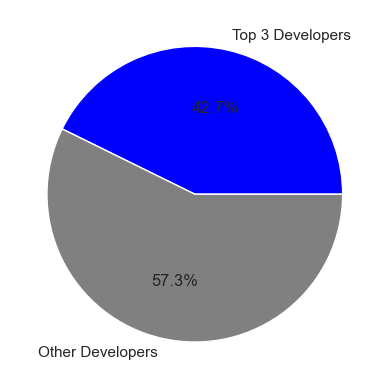

In [33]:
top3_dev_perc = developer_counts[:3].sum() / developer_counts.sum() * 100
other_dev_perc = 100 - top3_dev_perc
dev_perc = [top3_dev_perc, other_dev_perc]
dev_labels = ['Top 3 Developers', 'Other Developers']
plt.pie(dev_perc, labels=dev_labels, autopct='%1.1f%%', colors=['blue', 'grey']);

### 2) We can do a study to check on which platform the games are sold the most in the last year of available data. This can be helpful for developers to decide on which platform to focus on to increase their sales in the furure. 

plot the distribution of sales by platform after for year 2016 which is the last year with enough data


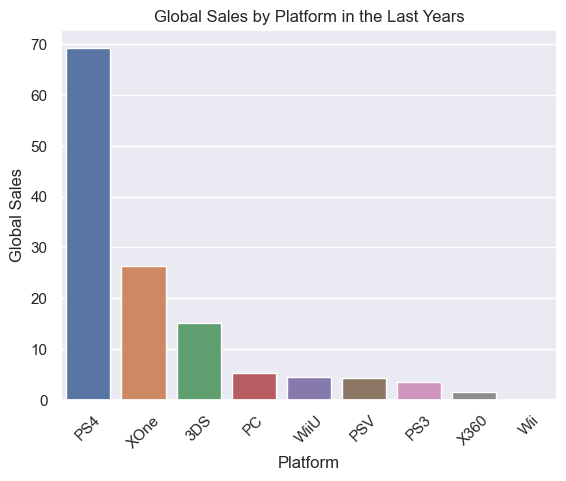

In [34]:
df_last_years = df[df['Year_of_Release'] == 2016]
platform_sales = df_last_years.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.xticks(rotation=45)
plt.title('Global Sales by Platform in the Last Years')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

We can see that PS4 and XOne are the platforms that have the most sales in the last years of available data. This means that developers can focus on these platforms to increase their sales in the future. In the games industry the recency of the platform is very important. The newer the platform, the more sales it will have as confirmed by the data.

### 2 bis) Another analysis which can be interesting to do is to check how the sales through years differ for different market regions. This would give us an idea of the trend of the sales in different regions.

plot for each year NA_Sales EU_Sales JP_Sales and Other_Sales 

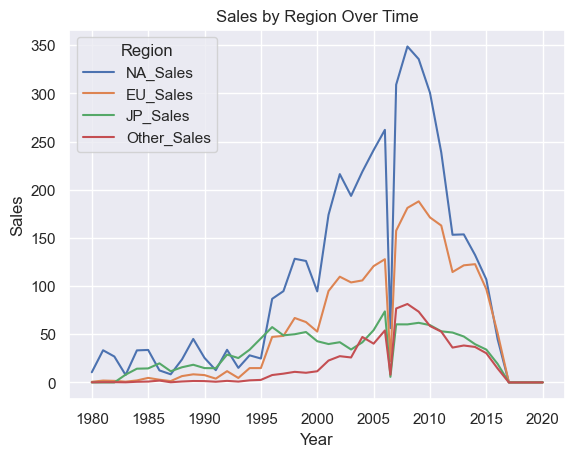

In [35]:
df_sales = df.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
df_sales = df_sales.melt(id_vars='Year_of_Release', var_name='Region', value_name='Sales')
sns.lineplot(x='Year_of_Release', y='Sales', hue='Region', data=df_sales)
plt.title('Sales by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [36]:
# describe the plot 